In [1]:
import re
import os

from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

## Visualizations

In [3]:
def curves(log_fn):
    batch_num = [-1]
    batch_mse = []
    batch_mun = []
    train_mse = []
    train_acc = []
    p_norm = []
    val_num = []
    val_mse = []
    val_acc = []
    with open(log_fn, 'r') as f:
        for line in f:
            m = re.match(('train.*'
                          'batch_num = ([0-9]+).*'
                          'batch_mse = ([.0-9]+).*'
                          'batch_mun = ([.0-9]+).*'
                          'train_mse = ([.0-9]+).*'
                          'train_acc = ([.0-9]+).*'
                          'p_norm = ([.0-9]+)'), line)
            if m is not None:
                batch_num.append(batch_num[-1] + 1)
                batch_mse.append(float(m.group(2)))
                batch_mun.append(float(m.group(3)))
                train_mse.append(float(m.group(4)))
                train_acc.append(float(m.group(5)))
                p_norm.append(float(m.group(6)))

            m = re.match(('test.*'
                          'val_mse = ([.0-9]+).*'
                          'val_acc = ([.0-9]+)'), line)

            if m is not None:
                val_num.append(batch_num[-1])
                val_mse.append(float(m.group(1)))
                val_acc.append(float(m.group(2)))

    batch_num = batch_num[1:]
    OFFSET=100
    plt.clf()
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
    fig.set_size_inches((15,25))
    
    ax1.plot(batch_num[OFFSET:], batch_mse[OFFSET:], label='batch mse')
    ax1.plot(batch_num[OFFSET:], train_mse[OFFSET:], label='train mse')
    ax1.plot(val_num, val_mse, label='val_mse')
    ax1.legend(loc=2)
    
    ax2.plot(batch_num[OFFSET:], train_acc[OFFSET:], label='train accuracy')
    ax2.plot(val_num, val_acc, label='val accuracy')
    ax2.legend(loc=4)
    
    ax3.plot(batch_num[OFFSET:], batch_mun[OFFSET:], label='batch mean user norm')
    ax3.legend(loc=2)
    
    ax4.plot(batch_num[OFFSET:], p_norm[OFFSET:], label='model parameter norm') 
    ax4.legend(loc=2)
    plt.show()

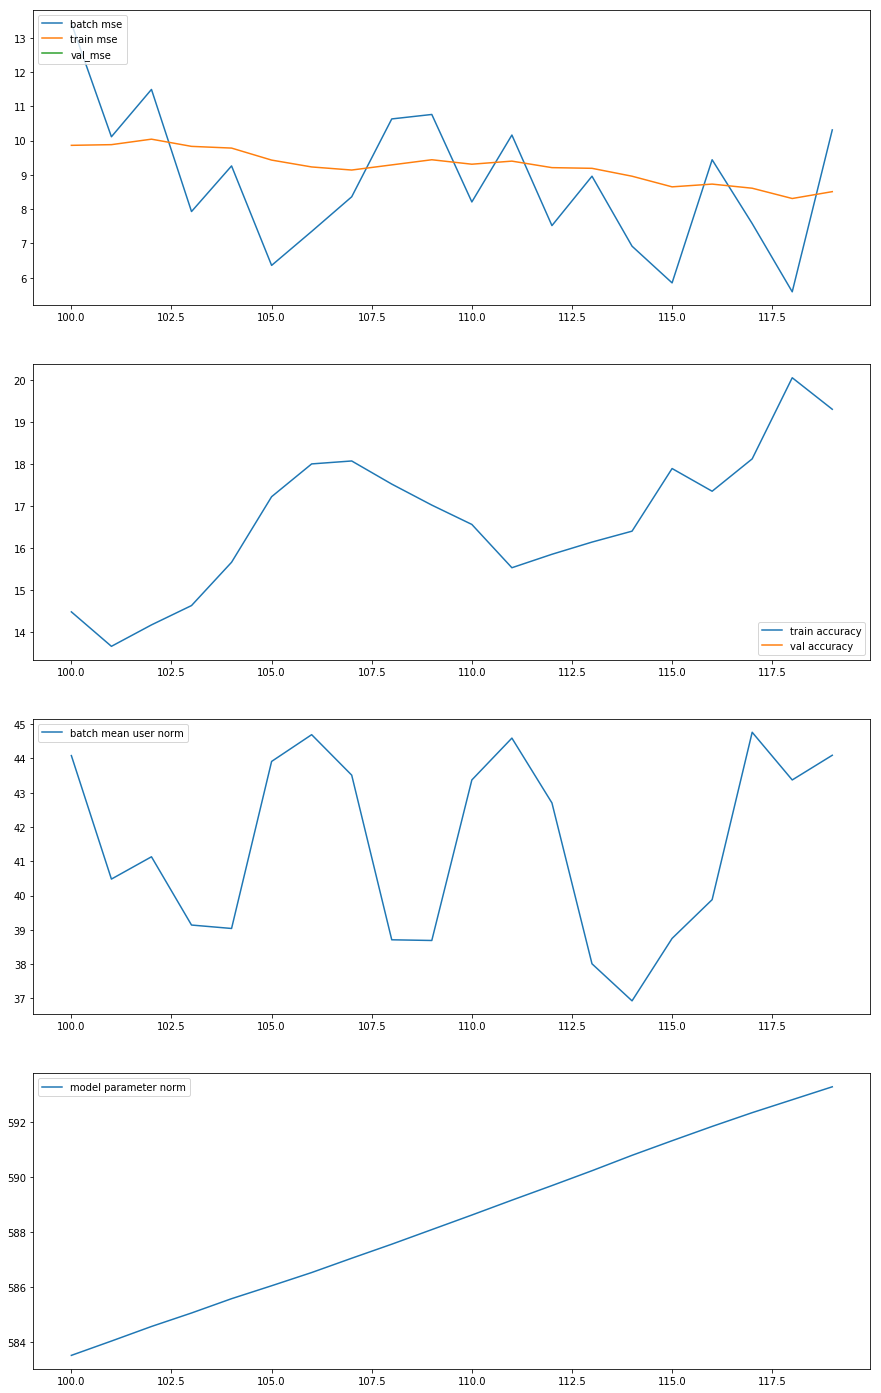

In [4]:
curves('logs/model_167034e/2018-06-11-22-19-29/log.txt');